# exploring hetmap function from seaborn.
# result quite dull
# normalization makes sense ? which one ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('final/sketch_all.xlsx')

In [3]:
#mhh, transform 189 to 1891, and 192 to 192something
data.groupby('year').count()

,PE,tech_type,BL
year,,,
0,173,173,173
189,1,1,1
192,1,1,1
1891,1,1,1
1905,325,325,325
...,...,...,...
2018,95,95,95
2019,67,67,67
2020,28,28,28


In [ ]:
# for heatmap i want 
#count of infra per year per BL
#need count per year and per BL

<AxesSubplot:xlabel='year'>

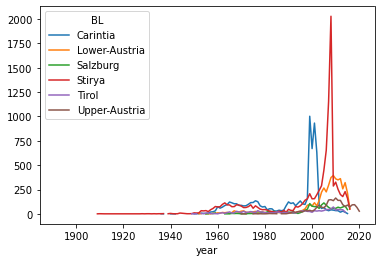

In [11]:
x=data.groupby(['year','BL']).count()['PE'].reset_index()
x=x[x.year>192]
x=x[x.year<2077]
x
y=x.groupby(['BL','year']).sum().reset_index()
z=y.pivot('year','BL','PE')
z.plot()

<AxesSubplot:xlabel='year'>

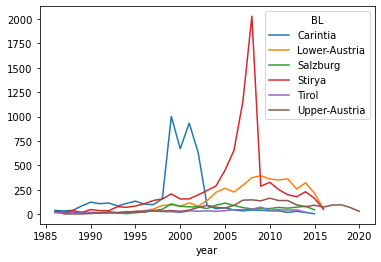

In [10]:
#add mean increase value ?
x=data.groupby(['year','BL']).count()['PE'].reset_index()
x=x[x.year>1985]
x=x[x.year<2077]
x
y=x.groupby(['BL','year']).sum().reset_index()
z=y.pivot('year','BL','PE')
z.plot()


<AxesSubplot:xlabel='BL', ylabel='year'>

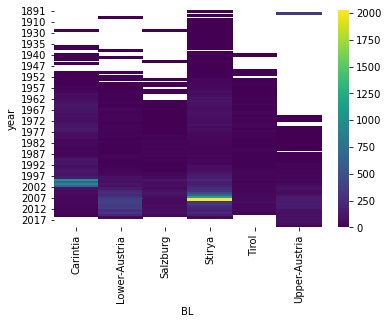

In [45]:
#oebo data is more recent. rest stops at 2016
z=y.pivot('year','BL','PE')
sns.heatmap(z,cmap='viridis')

In [ ]:
#how to avoid color scheme chaos
# define bins ?
#reduce timelapse
# cut values like what is >1000 ==1000 . this is bad
# can we reduce distance between values without altering them ?

<AxesSubplot:xlabel='year'>

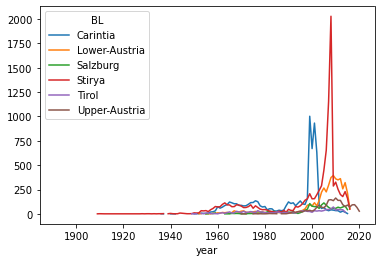

In [38]:
z.plot()

In [7]:
recent_year_values=z[z.year>1985]


AttributeError: 'DataFrame' object has no attribute 'year'

<AxesSubplot:xlabel='BL', ylabel='year'>

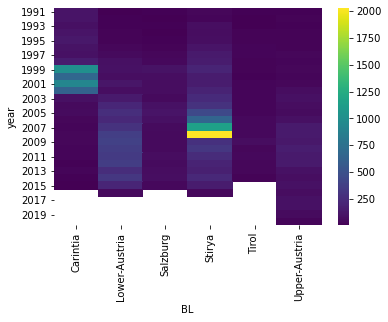

In [41]:
#only plot recent stuff
recent=z[z.index>1990]
sns.heatmap(recent,cmap='viridis')


<AxesSubplot:xlabel='BL', ylabel='year'>

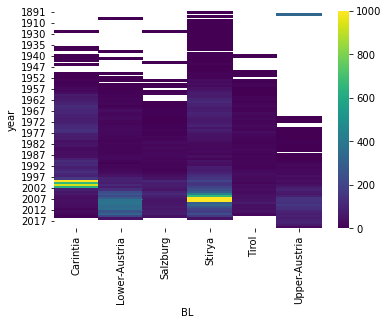

In [50]:
#substitute values . terrible
rep=z.mask(z>1000,1000)
sns.heatmap(rep,cmap='viridis')

<AxesSubplot:xlabel='BL', ylabel='year'>

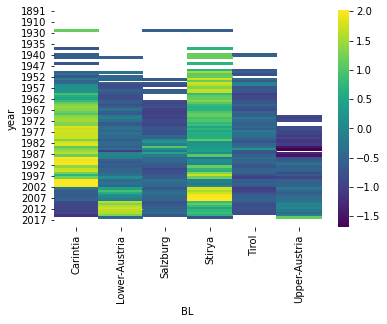

In [43]:
#normalize data
df_norm_row = z.apply(lambda x: (x-x.mean())/x.std(), axis = 1)

sns.heatmap(df_norm_row,cmap='viridis')

In [ ]:
#heatmap for country
# doesnt work becaue only one variable

<AxesSubplot:xlabel='year'>

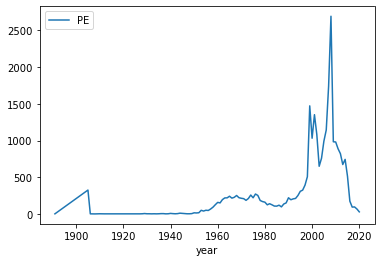

In [27]:
year_values=x.groupby('year').sum()['PE'].reset_index()
year_values.plot(x='year')

<AxesSubplot:xlabel='year'>

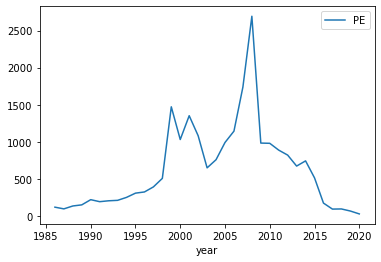

In [37]:
#zoom on recent
recent_year_values=year_values[year_values.year>1985]
recent_year_values.plot(x='year')

In [ ]:
#trying yo mke a bubble plot here. like scatter, but sizeof points based on sumPE.
#but i  need sumPE to do it
#sns.scatterplot(z, x='year', y='BL', size='PE')
